# Submission report

This file countains an report for the submission describing the technichs used and how they were implemented in order to solve the issue.

The implementation was split into the files `Navigation.ipynb`, `dqn_agent.py` and `model.py`. 

## Neural networks model. 

The neural networks models developed were placed into the `model.py`. The file above countains two classes:

1. QNetwork
2. DuelingQNetwork

Both have the same number of inputs and outputs, being the input the "state_size", and the output the "action_size", but they differ in implementation as the first one is a Deep Q Network and the second is and Duelling Deep Q Network. 

### Deep Q Network.

The DQN implemented at the QNetwork class has two hidden layers with 1024 and 512 neurons, respectively, and applies and ReLU activation function between those layers. 


### Duelling Deep Q Network

The Duelling Deep Q Network is similar to the "vanilla one", discussed above, but it has two separate data streams which tries to fit the function behaviour of the "Advantage" and the "Stable-Value". The Advantage stream has the same architecture as the original DQN, with two hidden layers with 1024 and 512 neurons respectively, and the state-value stream countains two hidden layers with 512 neurons each and the output is generated at line 71 of the `model.py` file, which combine both streams outputs as described in the article. 


## Agent description file.


The file `dqn_agent.py` countains the class that implements the **Replay buffer***. The mechanism, described at the **ReplayBuffer**, line 283. This class has the following parameters at it's constructor:

| Name        | Description                                                          |
|-------------|----------------------------------------------------------------------|
| action_size | Size of the action size space                                        |
| buffer_size | Total number of elements to be saved                                 |
| batch_size  | How many will be used to train the neural network per training cycle |
| seed        | Seed for random number generation                                    |


The file `dqn_agent.py` countains the class that implements the **Experience replay buffer***. The mechanism, described at the **PrioritizedReplayBuffer**, line 193. This class has the following parameters at it's constructor:


| Name              | Description                                                                                                                                                                                                               |
|-------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| action_size       | Size of the action size space                                                                                                                                                                                             |
| buffer_size       | Total number of elements to be saved                                                                                                                                                                                      |
| batch_size        | How many will be used to train the neural network per training cycle                                                                                                                                                      |
| seed              | Seed for random number generation                                                                                                                                                                                         |
| prioritize_weight | AKA the alpha parameter. A value of zero uses an uniform distribution for sampling the elements, as the vanilla replay buffer, <br>and 1.0 fully uses each element "importance" to increase it's chance of being sampled. |
| beta_scheduler    | Defines how the beta parameter will be changed after each episode.                                                                                                                                                        |


**Importante Note"**

The Prioritized Replay Buffer was not fully tested. It was very low performance on training and due to time restriction issues, i could not debug and correct it in order to generate the output. 

## Testing and results

In order to validate how to agent would perform which the different improvements proposed at the lessons, the agent class, `dqn_agent.py` line 21, has the following parameters in it's constructor:

| Name              | Description                                                                                                        |
|-------------------|--------------------------------------------------------------------------------------------------------------------|
| state_size        | Number of states that the agent countains                                                                          |
| action_size       | Number of actions that the agent countains                                                                         |
| seed              | Seed for random number generation                                                                                  |
| ddqn              | True or False: If the Double Q Network or the "vanilla" DQN model.                                                 |
| dueling           | True or False:Enable or disable the "duelling" architecture                                                        |
| init_td           | If prioritize_weight != 0, the constant probability of any element bein sampled.                                   |
| prioritize_weight | AKA the alpha value. If != 0, then enable the prioritized replay buffer, otherwise, use the default replay buffer. |
| beta_scheduler    | The "beta scheduler" that increse the beta value for each episode.                                                 |


Using these parameters the model loaded into the `Navigation.ipynb` loaded the agent in different configurations and performed the training saving it's scores for comparison later. 

The training was performend in the follow notebook cells:

| Exec. Order | Model Type          | Notebook cell |
|------------:|---------------------|---------------|
|          1. | Vanilla             | 7             |
|          2. | Double DQN          | 8             |
|          3. | Duelling DQN        | 9             |
|          4. | Double Duelling DQN | 10            |

The number of episodes that the agent takes in order to achieve the desired score of 13.0, with a mean window of the 100 last episodes are:


| Model Type          | Number of episodes to achieve the solution criteria |
|---------------------|---------------|
| Vanilla             | 1241          |
| Double DQN          | 1242          |
| Duelling DQN        | 1527          |
| Double Duelling DQN | 1299          |

## Hyperparameters

The file `dqn_agent.py` has hardcoded at lines 12 through 17 the hyperparameters that were used for training the networks. Those were not tunned for each architecture in order to make easier to compare the outputs. The hyperparameters are:

| **Hyperparameter** | **Description**                                                                                                                          |
|--------------------|------------------------------------------------------------------------------------------------------------------------------------------|
| **BUFFER_SIZE**    | How many tuples to have for experience replay.                                                                                           |
| **BATCH_SIZE**     | How many tuples to pull from the buffer for each training.                                                                               |
| **GAMMA**          | Discont factor.                                                                                                                          |
| **TAU**            | The "smoothing" factor that makes the update of the parameters for the local network slower after a training phase of the target network |
| **LR**             | Learning rate for the network. Related of how much the hyperparemeters will change after a backpropagation cycle.                        |
| **UPDATE_EVERY**   | How many cycles of interaction with the environment should happen before the agent runs a learning batch.                                |

The values that were choosen for the results showed below were:

| **Hyperparameter** | **Description** |
|--------------------|-----------------|
| **BUFFER_SIZE**    | 100000          |
| **BATCH_SIZE**     | 128             |
| **GAMMA**          | 0.99            |
| **TAU**            | 0.001           |
| **LR**             | 0.0005          |
| **UPDATE_EVERY**   | 4               |

### Deep Q Network

The scores reported by the training of the agent using the Deep Q Network were saved over the `dqn_scores.txt` file. 

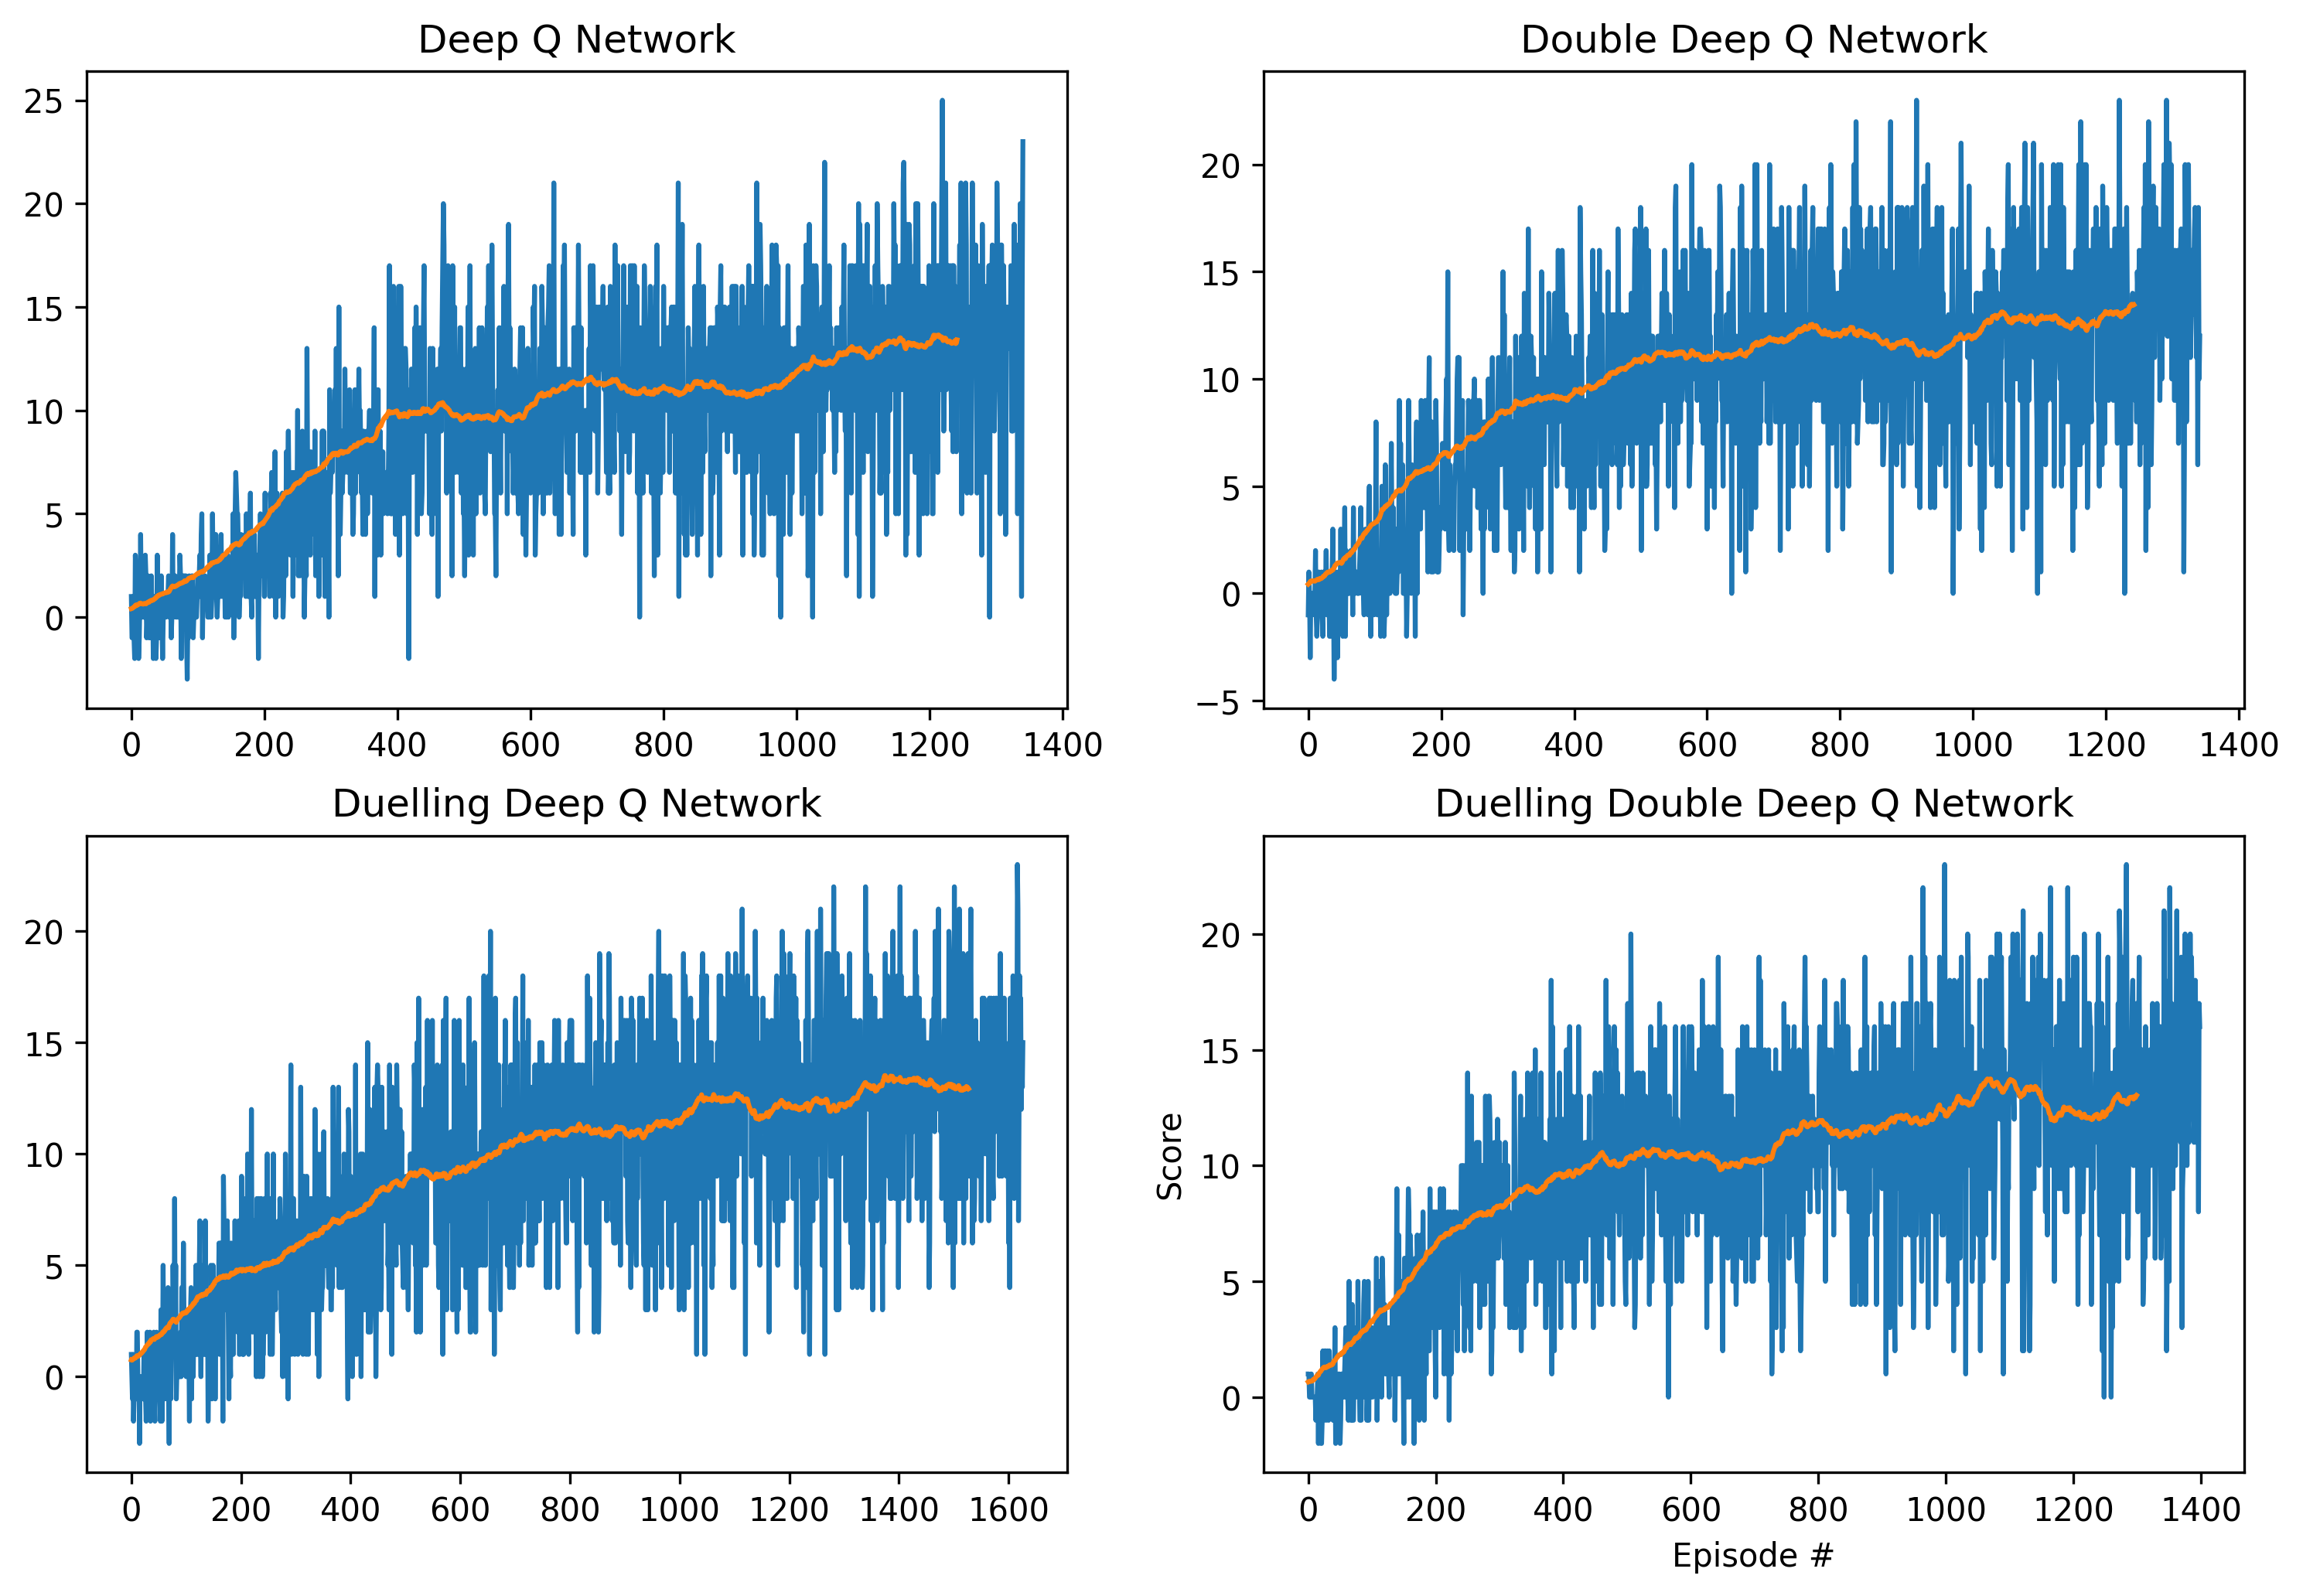

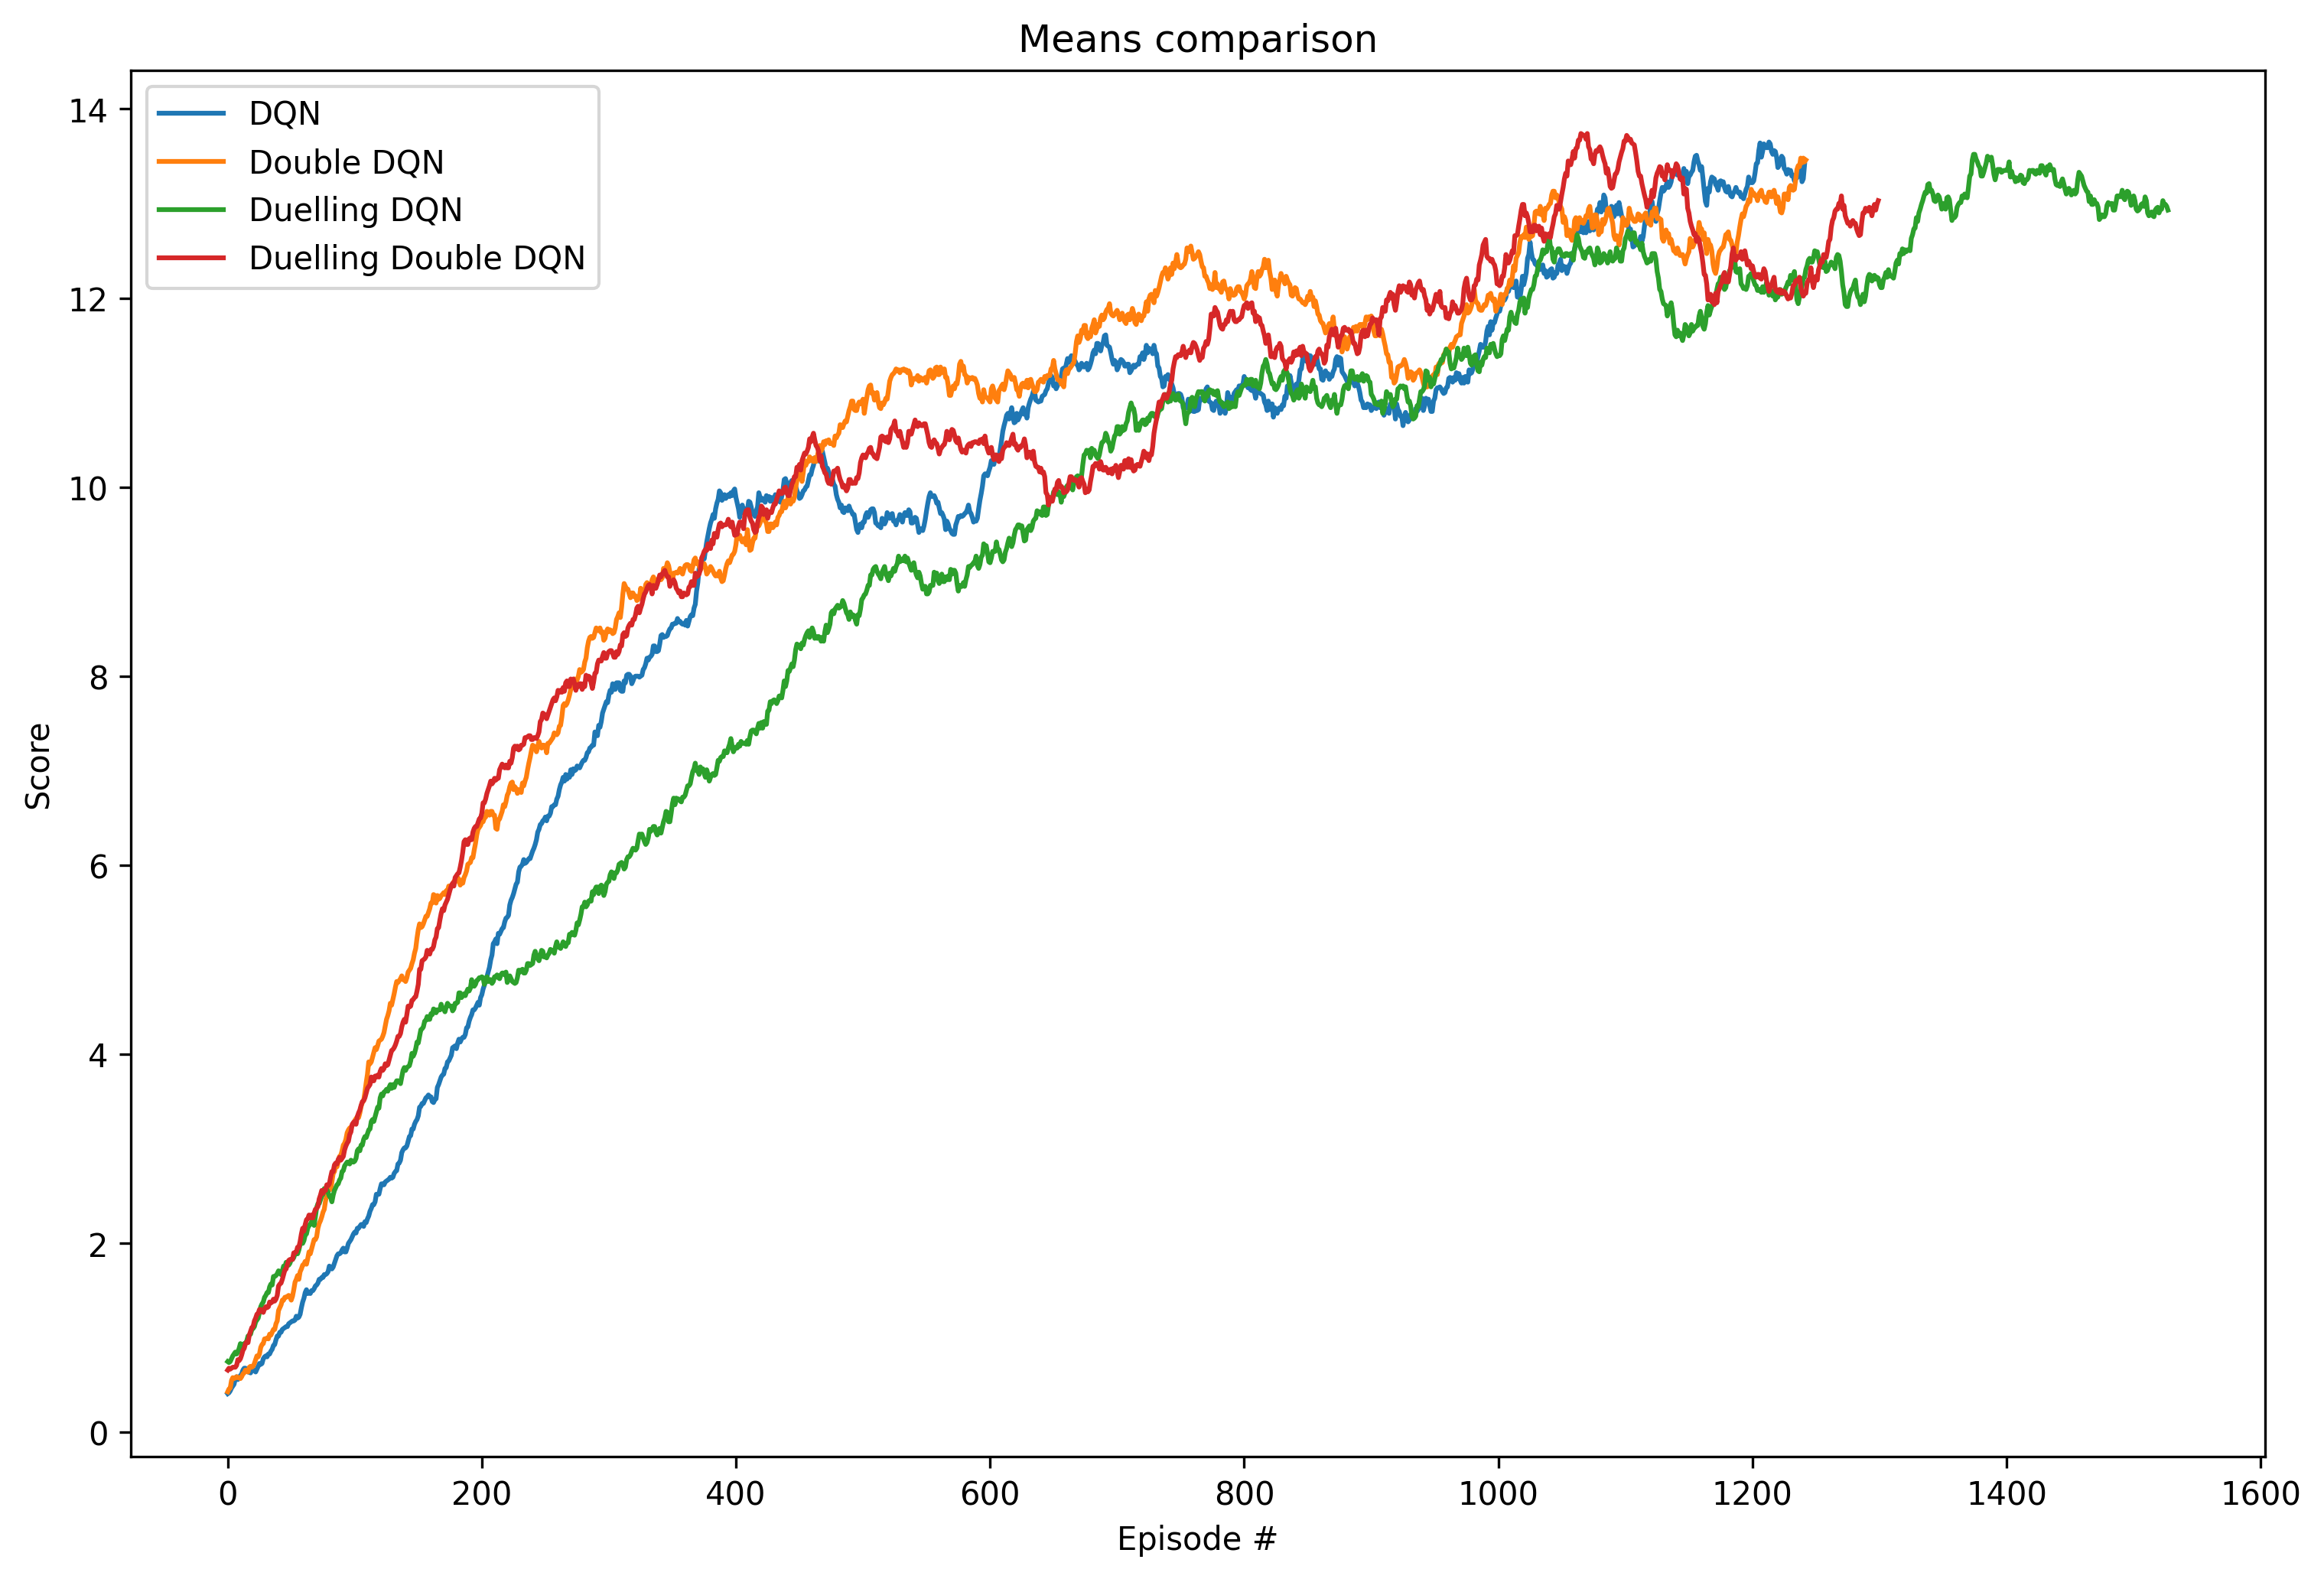

In [26]:
import numpy as np
import matplotlib.pyplot as plt

def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

# Loading DQN network for showing the plot
_, dqn_scores = np.loadtxt('dqn_scores.txt')
_, ddqn_scores = np.loadtxt('ddqn_scores.txt')
_, duelling_scores = np.loadtxt('duelling_scores.txt')
_, duelling_ddqn_scores = np.loadtxt('duelling_ddqn_scores.txt')


dqn_scores_mean = moving_average( dqn_scores, 100 )
ddqn_scores_mean = moving_average( ddqn_scores, 100 )
duelling_scores_mean = moving_average( duelling_scores, 100 )
duelling_ddqn_scores_mean = moving_average( duelling_ddqn_scores, 100 )

fig = plt.figure(figsize=(12,8), dpi=300, facecolor='w', edgecolor='k')

#dqn
ax = fig.add_subplot(221)
plt.title("Deep Q Network")
plt.plot(np.arange(len(dqn_scores)), dqn_scores)
plt.plot(np.arange(len(dqn_scores_mean)), dqn_scores_mean)

#ddqn
ax = fig.add_subplot(222)
plt.title("Double Deep Q Network")
plt.plot(np.arange(len(ddqn_scores)), ddqn_scores)
plt.plot(np.arange(len(ddqn_scores_mean)), ddqn_scores_mean)

#duelling
ax = fig.add_subplot(223)
plt.title("Duelling Deep Q Network")
plt.plot(np.arange(len(duelling_scores)), duelling_scores)
plt.plot(np.arange(len(duelling_scores_mean)), duelling_scores_mean)

#duelling ddqn
ax = fig.add_subplot(224)
plt.title("Duelling Double Deep Q Network")
plt.plot(np.arange(len(duelling_ddqn_scores)), duelling_ddqn_scores)
plt.plot(np.arange(len(duelling_ddqn_scores_mean)), duelling_ddqn_scores_mean)


plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()


fig = plt.figure(figsize=(12,8), dpi=300, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111)
plt.plot( np.arange( len(dqn_scores_mean) ), dqn_scores_mean )
plt.plot( np.arange( len(ddqn_scores_mean)), ddqn_scores_mean )
plt.plot( np.arange( len(duelling_scores_mean)), duelling_scores_mean )
plt.plot( np.arange( len(duelling_ddqn_scores_mean)), duelling_ddqn_scores_mean )


plt.title( "Means comparison" )
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.legend(['DQN', 'Double DQN', 'Duelling DQN', 'Duelling Double DQN'])
plt.show()

## Results and testing

The last cell of `Navigation.ipynb` countains a piece of code that allows to choose which of the above network architecture to load and use while running the environment. The `pth` files were saved accordingly with the names of the network architectures that resulted in its parameters. 

| **Architecrture**              | **Output file**              |
|--------------------------------|------------------------------|
| Deep Q Network                 | vanilla_checkpoint.pth       |
| Double Deep Q Network          | ddqn_checkpoint.pth          |
| Duelling Deep Q Network        | duelling_checkpoint.pth      |
| Duelling Double Deep Q Network | duelling_ddqn_checkpoint.pth |


An sample of the agent using the Duelling Double Q Network to solve the environment can be seen at: https://youtu.be/Gmi4GGNuwwY

## Improvements and future work

### Prioritized experience replay

One obvious improvement to be implemented is to fix and understand better the problems with the prioritized experience replay in order to make it faster to train and compare the results with the one displayed above. 

### Hyperparameter search

Implement and strategy to search through some of the hyperparameters in order to improve the network output and maximize it's learning in the minimum amount of time. In another Udacity nanodeegre there is a technich for parameter search, Twiddle, that could be helpful in order to perform this kind of task. 

### Challenge: Learning from Pixels

Altough is not necessarily an improvement, it would be very interesting to implement the "Pixel" variant of this project in order to understand how to use "camera" based input for training the agent. One behaviour that was seen is that sometimes the agent seems to oscilate when there are some "bananas" placed in order that two actions seems to give an approximate reward. Using the "camera" and not the 360 sensor could help the agent to focus on bananas that are visible to it's field of view and thus making it less prone to oscilate.  